In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.0)

In [2]:
#Import data
data_edu = pd.read_csv('Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012_.csv')

In [3]:
data_edu.columns

Index(['School ID', 'Name of School', 'Elementary, Middle, or High School',
       'Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
       'Network Manager', 'Collaborative Name',
       'Adequate Yearly Progress Made? ', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'Healthy Schools Certified?', 'Safety Icon ', 'Safety Score',
       'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Leaders Icon ', 'Leaders Score ',
       'Teachers Icon ', 'Teachers Score', 'Parent Engagement Icon ',
       'Parent Engagement Score', 'Parent Environment Icon',
       'Parent Environment Score', 'Average Student Attendance',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math 

In [4]:
selected_cols = ['ZIP Code','Elementary, Middle, or High School','CPS Performance Policy Level',
       'Safety Score','Family Involvement Score',
       'Environment Score','Instruction Score','Leaders Score ',
       'Teachers Score','Parent Engagement Score', 'Average Student Attendance',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
         'Graduation Rate %',
       'College Enrollment Rate %','Teachers Icon ','Instruction Icon ']

edu_df = data_edu[selected_cols]

edu_df = edu_df.loc[edu_df['CPS Performance Policy Level'].isin(['NDA', 'Not Enough Data'])==False]

#Clean College Enrollment Rate column to have float data
edu_df['College_enroll_rate'] = edu_df['College Enrollment Rate %'].apply(lambda i: 0 if i =='NDA' else float(i))

In [5]:
edu_df.loc[edu_df['College_enroll_rate'] != 0].groupby('CPS Performance Policy Level')['College_enroll_rate'].mean()

CPS Performance Policy Level
Level 1    80.109091
Level 2    56.648148
Level 3    50.700000
Name: College_enroll_rate, dtype: float64

In [6]:
edu_df.nunique()

ZIP Code                                    51
Elementary, Middle, or High School           3
CPS Performance Policy Level                 3
Safety Score                                85
Family Involvement Score                    70
Environment Score                           79
Instruction Score                           82
Leaders Score                               79
Teachers Score                              76
Parent Engagement Score                     30
Average Student Attendance                 142
Rate of Misconducts (per 100 students)     321
Average Teacher Attendance                  55
Graduation Rate %                           71
College Enrollment Rate %                   70
Teachers Icon                                6
Instruction Icon                             6
College_enroll_rate                         70
dtype: int64

In [7]:
edu_df.isna().sum()

ZIP Code                                    0
Elementary, Middle, or High School          0
CPS Performance Policy Level                0
Safety Score                               42
Family Involvement Score                    0
Environment Score                          42
Instruction Score                          42
Leaders Score                               0
Teachers Score                              0
Parent Engagement Score                     0
Average Student Attendance                  0
Rate of Misconducts (per 100 students)      0
Average Teacher Attendance                  0
Graduation Rate %                           0
College Enrollment Rate %                   0
Teachers Icon                               0
Instruction Icon                            0
College_enroll_rate                         0
dtype: int64

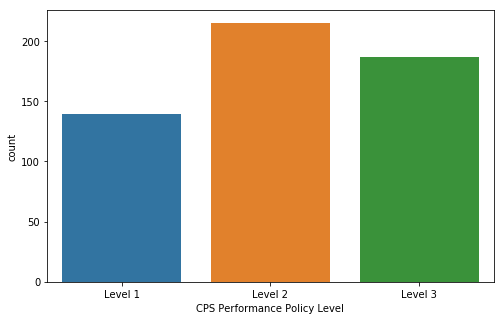

In [10]:
sns.countplot(x = 'CPS Performance Policy Level', data = edu_df)

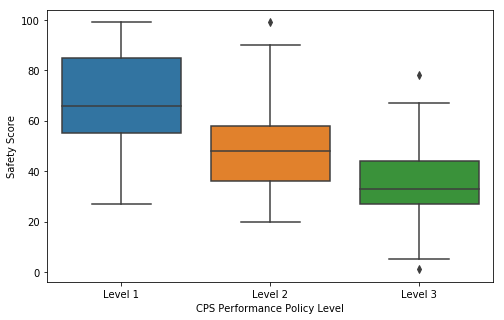

In [11]:
sns.boxplot(y = 'Safety Score', x = 'CPS Performance Policy Level', data = edu_df);

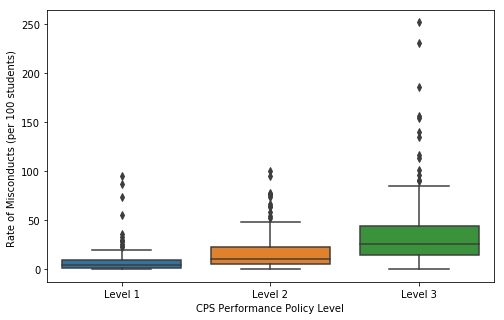

In [12]:
sns.boxplot(y = 'Rate of Misconducts (per 100 students) ', x = 'CPS Performance Policy Level', data = edu_df);

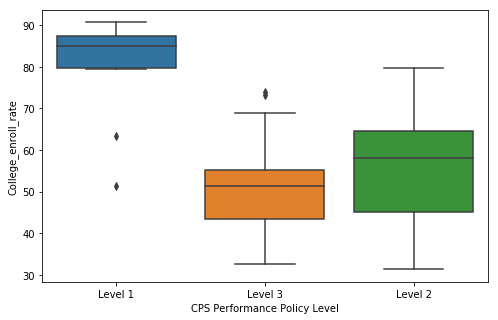

In [13]:
sns.boxplot(y = 'College_enroll_rate', x = 'CPS Performance Policy Level', data = edu_df.loc[edu_df['College_enroll_rate'] != 0]);

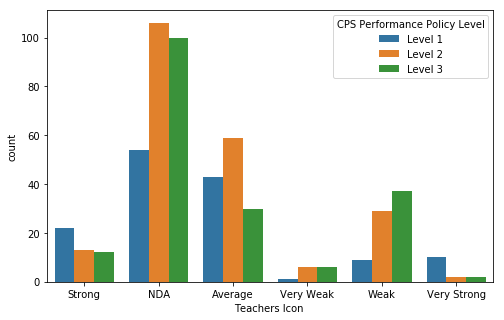

In [14]:
sns.countplot(hue = 'CPS Performance Policy Level', x = 'Teachers Icon ', data = edu_df)

In [15]:
edu_final = edu_df.groupby(['ZIP Code','CPS Performance Policy Level']).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
edu_final['Total_schools'] = edu_final.iloc[:,1:].sum(axis = 1)
edu_final['Percent_level1'] = round((edu_final['Level 1']/edu_final.Total_schools) *100,2)
edu_final['Percent_level2'] = round((edu_final['Level 2']/edu_final.Total_schools) *100,2)
edu_final['Percent_level3'] = round((edu_final['Level 3']/edu_final.Total_schools) *100,2)
edu_final


,ZIP Code,Level 1,Level 2,Level 3,Total_schools,Percent_level1,Percent_level2,Percent_level3
0,60605,2,0,0,2,100.00,0.00,0.00
1,60607,4,0,0,4,100.00,0.00,0.00
2,60608,3,10,5,18,16.67,55.56,27.78
3,60609,3,11,7,21,14.29,52.38,33.33
4,60610,2,2,2,6,33.33,33.33,33.33
5,60612,8,7,4,19,42.11,36.84,21.05
6,60613,5,3,0,8,62.50,37.50,0.00
7,60614,4,3,0,7,57.14,42.86,0.00
8,60615,0,4,7,11,0.00,36.36,63.64
9,60616,6,2,4,12,50.00,16.67,33.33


In [16]:
edu_final.to_csv('Chicago_school_area_ratings.csv')
